# Project

#### Stefano Riato
#### Matricola ID: 894041
#### Ca' Foscari University of Venice
#### Project for Lab of Information Systems and Analytics
#### May 2024

# Summary of the Project Roadmap

1. **Load Dataset**
2. **Data Cleaning** 
3. **Exploratory Data Analysis (EDA)** 
4. **Data Pre-processing**
5. **Feature Engineering**
6. **Model Training, Hyper-Tuning parameters and Evaluation**
7. **Conclusions**



# Load Dataset

In [2]:
# Importing libraries and setting options
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt     # To plot graphs
import seaborn as sns               # To plot graphs
sns.set_style('whitegrid')          # To set the style of the graphs

pd.options.display.max_columns = 90 # To display all the columns of the dataframe   

In [3]:
data_full = pd.read_csv('../datasets/bank/bank-full.csv', sep=';')


# Data Cleaning

In this part we are going to:

- **Handling missing values**: I will identify columns with missing values and decide how to handle them, for example by deleting rows, filling with the mean or median, or using more advanced imputation methods.
- **Removing outliers**: I will use statistical methods to identify and remove outliers that could distort the analysis.
- **Coding of categorical variables**: I will transform the categorical variables into a format that can be used for analysis, for example using one-hot coding or label coding.
- **Data normalization**: If necessary, I will normalize the data to bring all variables to a common scale. 

In [4]:
# the shape of the dataset 
print('The dataset has {} rows and {} columns.'.format(data_full.shape[0], data_full.shape[1]))
print('\n')
# look at the first lines of the dataset
data_full.head()



The dataset has 45211 rows and 17 columns.




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# look at the last lines of the dataset
data_full.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Get information about the dataset (data types, number of non-null values, etc.)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset does not contain any NaN values. But we need to confirm that. So we use the code below:

In [7]:
# Check if there is some NaN values
if (data_full.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are no NaN values in the dataset.


We investigate the dataset with some statistics:

In [8]:
data_full.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


We can notice that pdays has a lot of -1 values. We need to investigate this column.
So we use the code below to check the number of -1 values in the pdays column:

In [9]:
# data cleaning -> check if there are too many -1 in the pdays column in order to drop them or the column
data_full['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

We can see that the column pdays has a lot of -1 values. This column is not useful for the prediction of the target variable y since it is not heterogeneous. So we can decide to drop it.

In [10]:
data_full = data_full.drop(['pdays'], axis=1)
data_full.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


# Exploratory Data Analysis (EDA)

- **Univariate analysis**: I will examine the distribution of each variable, for example using histograms or box plots.
- **Bivariate analysis**: I will examine relationships between pairs of variables, for example using scatter plots or calculating correlation coefficients.
- **Multivariate analysis**: I will examine relationships between multiple variables, for example using correlation matrices or dimensionality reduction techniques such as principal component analysis (PCA).

First, we analyse the variable to predict, which is the column y (if the client will subscribe a term deposit or not). We can see if the problem is balanced. This will affect how we evaluate the models.

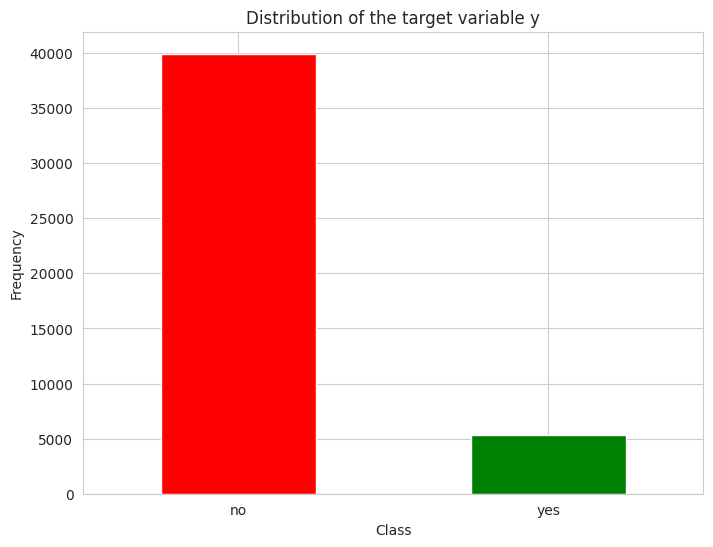

In [11]:
# frequency
y_counts = data_full['y'].value_counts()

# bar plt graph
plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of the target variable y')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


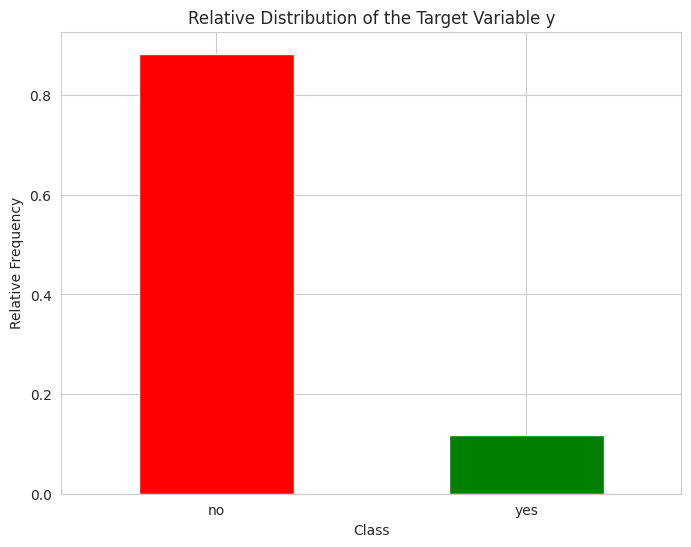

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [12]:
# Calculate the relative frequency of the target variable 'y'
y_relative_frequency = data_full['y'].value_counts(normalize=True)

# Plotting the relative frequency as a bar plot
plt.figure(figsize=(8, 6))
y_relative_frequency.plot(kind='bar', color=['red', 'green'])
plt.title('Relative Distribution of the Target Variable y')
plt.xlabel('Class')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

y_relative_frequency

We perfomed an univariate analysis of the target variable y (Graph 1). We can see that the dataset is unbalanced. The variable y has more or less *40.000* instances of the class 'no' and *5.000* instances of the class 'yes'. This is a problem because the model will be biased towards the class 'no' and it will not be able to predict the class 'yes' correctly.

From this graph we can see a relative frequency of *88.3%* of the class 'no' and only *11.7%* of the class 'yes'. So the dataset is imbalanced.

So we know that we need to use stratified cross-validation, using the *StratifiedKFold* class from the *sklearn.model_selection* module.

In this way we split the data such that the proportion between classes are the same in each fold as they are in the whole dataset.



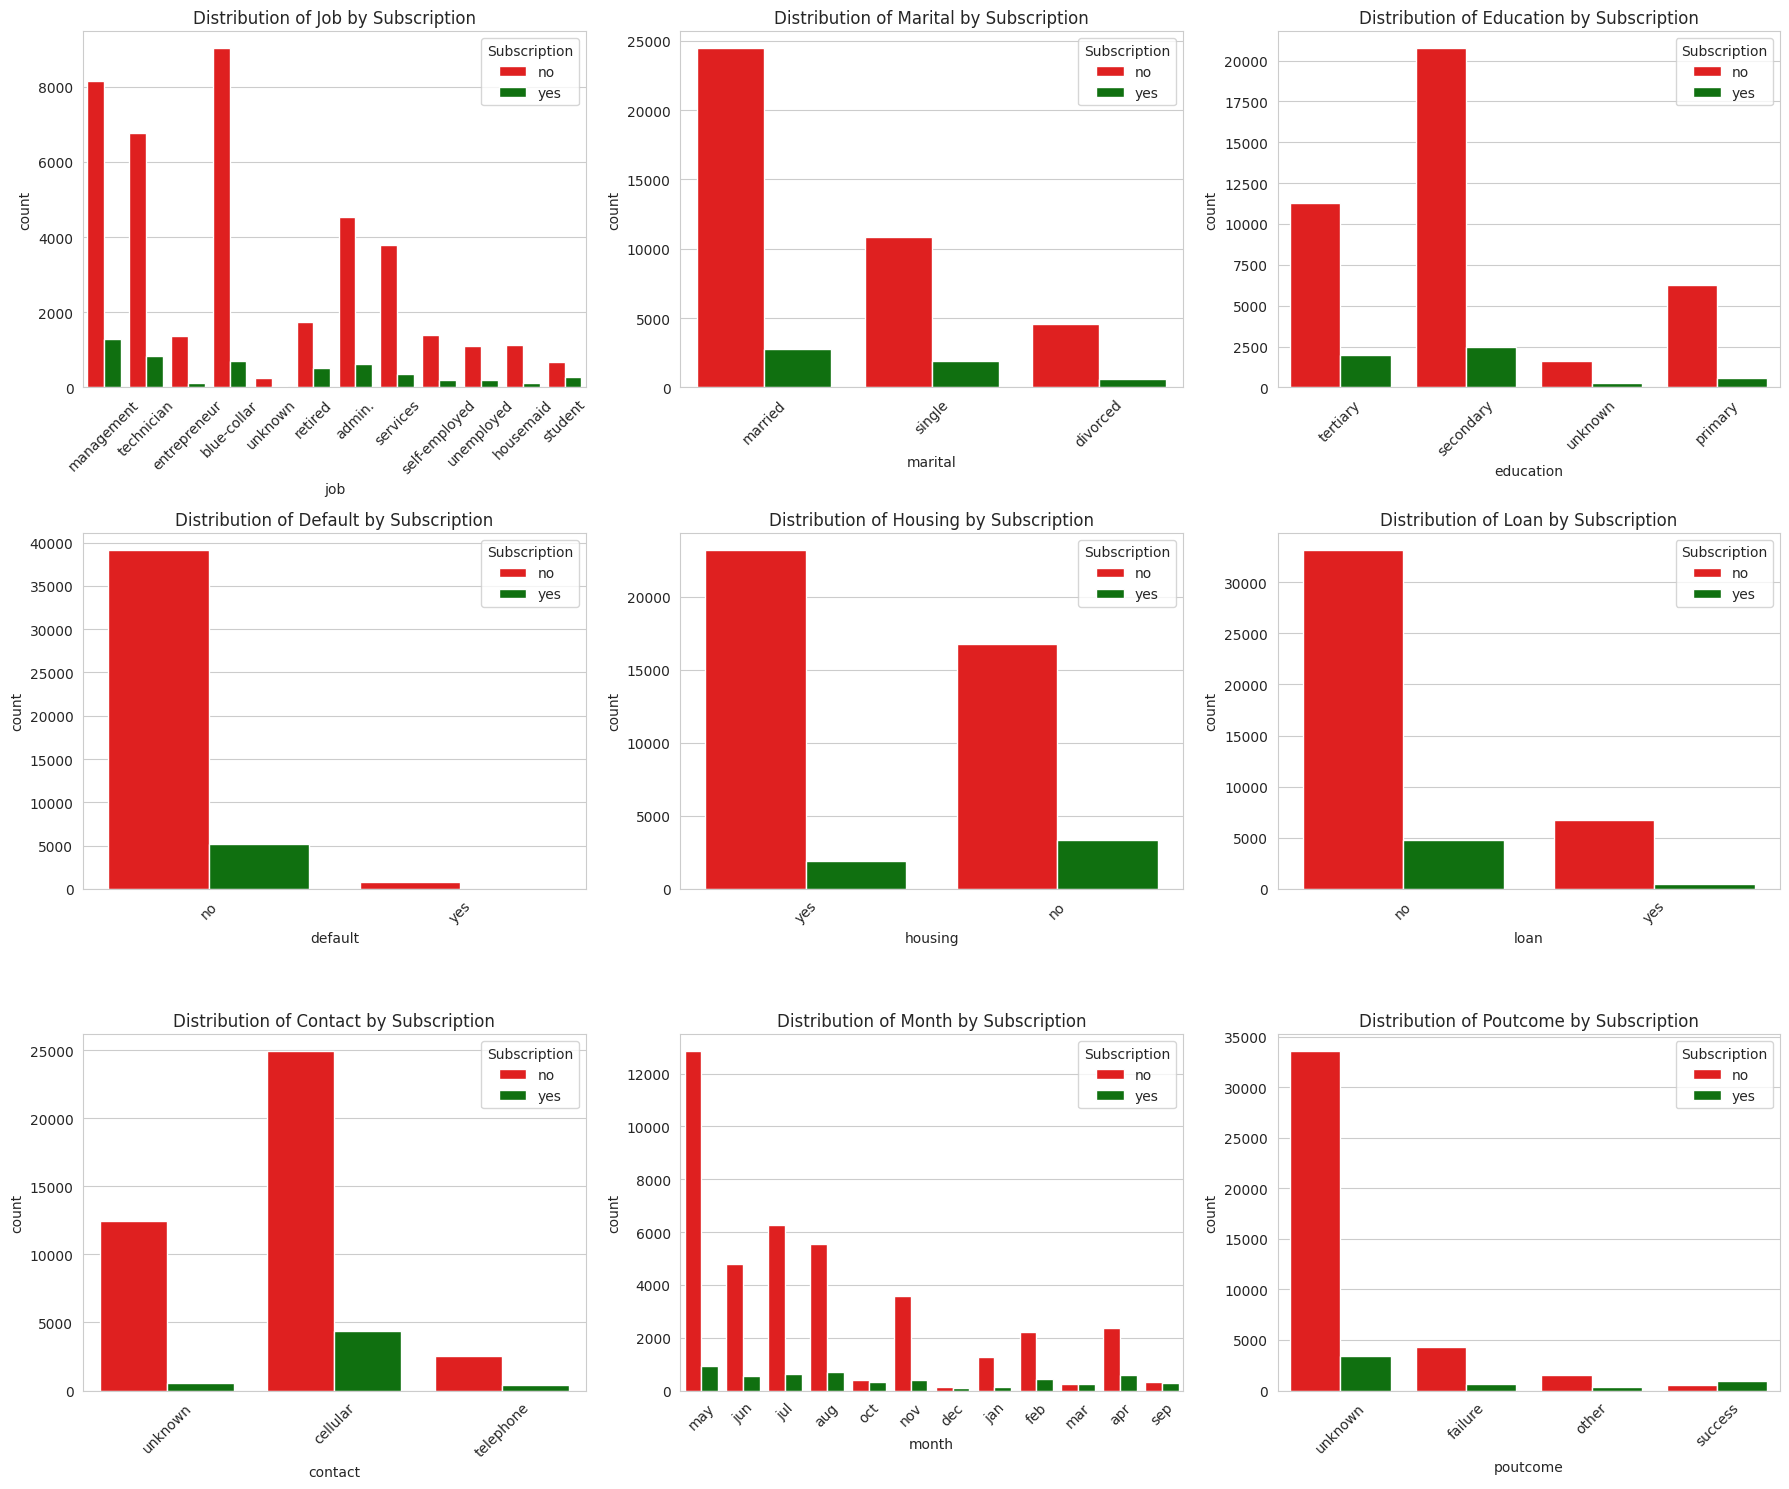

In [13]:
# Visualizing the distribution of categorical variables with respect to the target variable 'y'

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    sns.countplot(data=data_full, x=var, hue='y', ax=axs[row, col], palette=['red', 'green'])
    axs[row, col].set_title(f'Distribution of {var.capitalize()} by Subscription')
    axs[row, col].tick_params(axis='x', rotation=45)
    axs[row, col].legend(title='Subscription', loc='upper right')

fig.tight_layout()
plt.show()


 Here we can have a broader analysis among the categorical varible of the Dataset data_full. 

We need to analyse in deep for some **NaN**:

- poutcome -> missing values "unknown"
- contact -> missing values "unknown"
- educational -> missing values "unknown"

Let's analyse in deep the two feature:

In [14]:
data_full['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [15]:
data_full['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [16]:
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In this moment we are in front of a scenario in which we need to deal with these 3 variables. We can be sure to drop **poutcome** and **education**: in **poutcome** there are many 'unknown" in relation of the total number of the rows (36.959); we can instead drop the rows in **education**;

Instead for contact we need to understand better and analyse the problem. There are 13020. 

In [17]:
data_full = data_full[data_full['education'] != 'unknown']
data_full['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

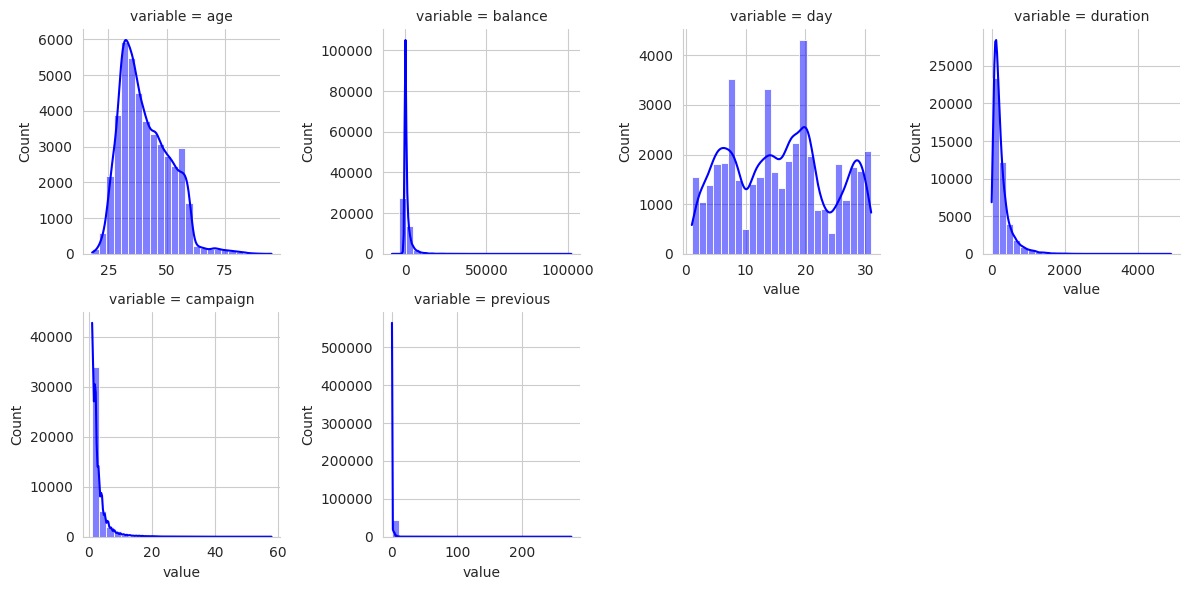

In [18]:
# Create a dataframe with only the numerical variables
data_num = data_full.select_dtypes(include=['int64', 'float64'])
# Melt the data into a long format so that I can plot the distribution of all numerical variables
pd.melt(data_full, value_vars=data_num.columns).groupby('variable').describe()

# Let's plot the distribution of all numerical variables
# Melt the data into a long format so that I can plot the distribution of all numerical variables
melt = pd.melt(data_full, value_vars=data_num.columns) 

# Wrap the columns to make it easier to read
g = sns.FacetGrid(melt, col="variable",  col_wrap=4, sharex=False, sharey=False) 

# Plot the distribution of each variable
g = g.map(sns.histplot, "value", bins=25, color="blue", kde=True)

/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


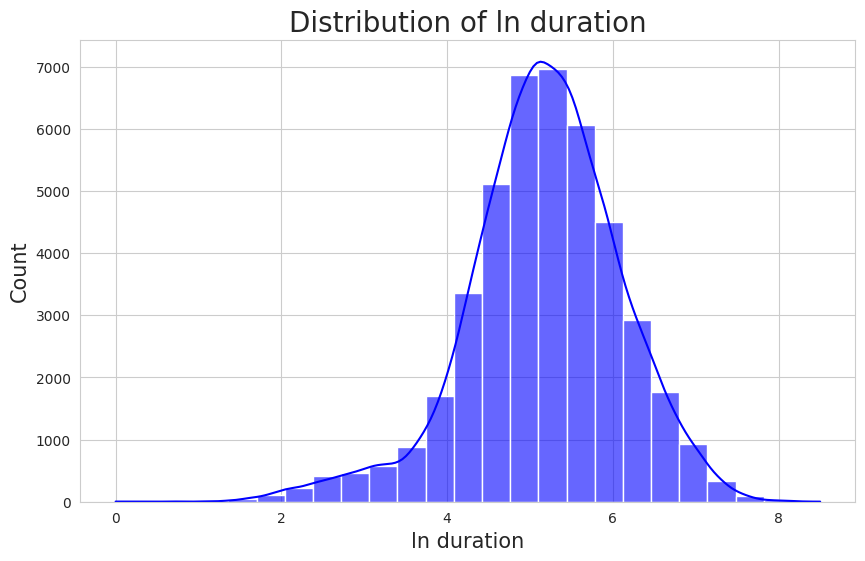

In [19]:
name = 'duration'
plt.figure(figsize=(10,6))
sns.histplot(np.log(data_full[name]), bins=25, kde=True, color='blue', alpha=0.6)
plt.title(f'Distribution of ln {name}', fontsize=20)
plt.xlabel(f'ln {name}', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show();

There are some continuos features that need to be analysed in deep. Age and Day are more clear and we are able to understand the distributions. Duration instead is skewed to the left, because duration of the calls does not last too much time. 


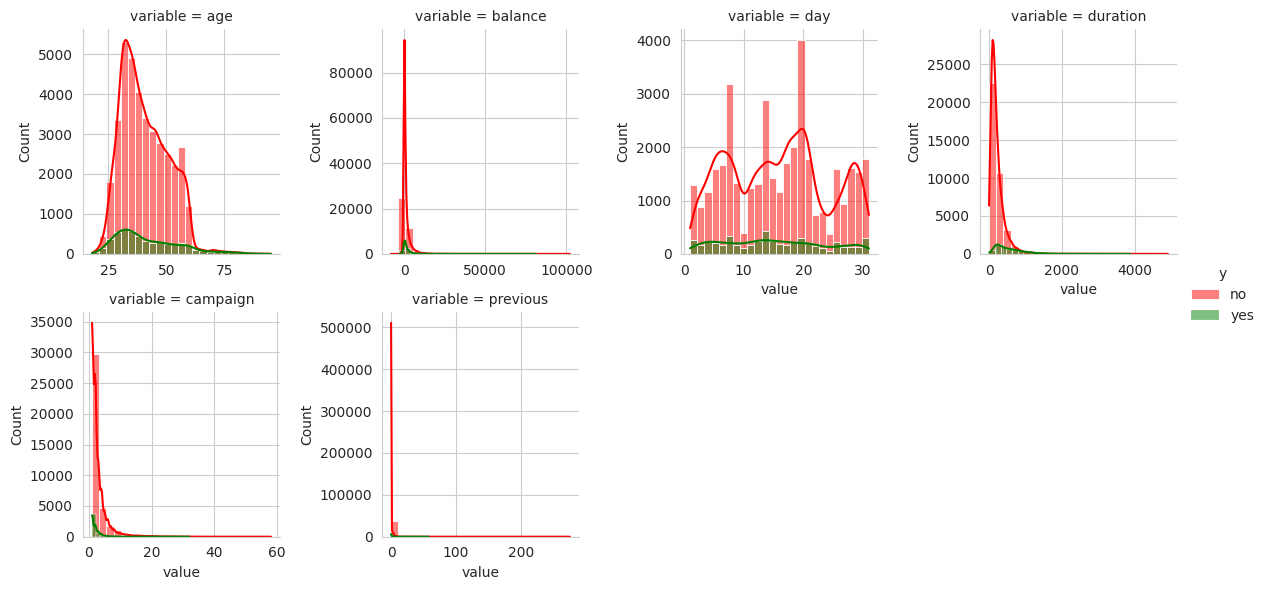

In [20]:
data_num = data_full.select_dtypes(include=['int64', 'float64'])

melt = pd.melt(data_full, id_vars='y', value_vars=data_num.columns)

g = sns.FacetGrid(melt, col="variable", hue="y", col_wrap=4, sharex=False, sharey=False, palette={'yes': 'green', 'no': 'red'})

g = g.map(sns.histplot, "value", bins=25, kde=True).add_legend()


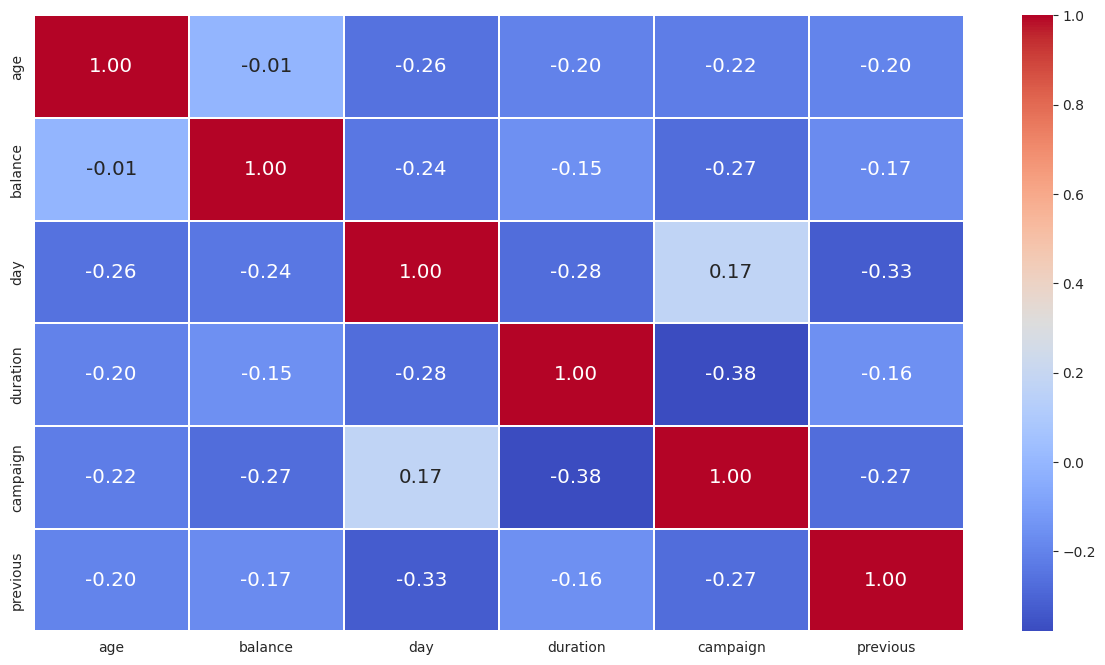

In [21]:
corr = data_full.select_dtypes(include=['int64', 'float64']).corr()

# Let's see the correlation between the numerical variables
# I will use the heatmap function from the seaborn library
# Select only numeric columns

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

In [22]:
data_full = data_full.drop('poutcome', axis=1)


In [23]:
data_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,no


# Pre-Processing Data

## Investigate the distribution of nominal features

We are going to check how many nominal, ordinal, continuous and discrete features there are in the dataset.

In [24]:
# Investigate the distribution of nominal features

# Count how many nominal, ordinal, continuous and discrete features there are in the dataset
nominal = 0
ordinal = 0
continuous = 0
discrete = 0
for col in data_full.columns:
    if data_full[col].dtype == 'object':
        #print(f'{col} is a nominal feature')
        nominal += 1
    elif data_full[col].dtype == 'int64':
        #print(f'{col} is a discrete feature')
        discrete += 1
    elif data_full[col].dtype == 'float64':
    
        continuous += 1
    else:
        ordinal += 1

print('There are {} nominal features, {} ordinal features, {} continuous features and {} discrete features.'.format(nominal, ordinal, continuous, discrete))

There are 9 nominal features, 0 ordinal features, 0 continuous features and 6 discrete features.


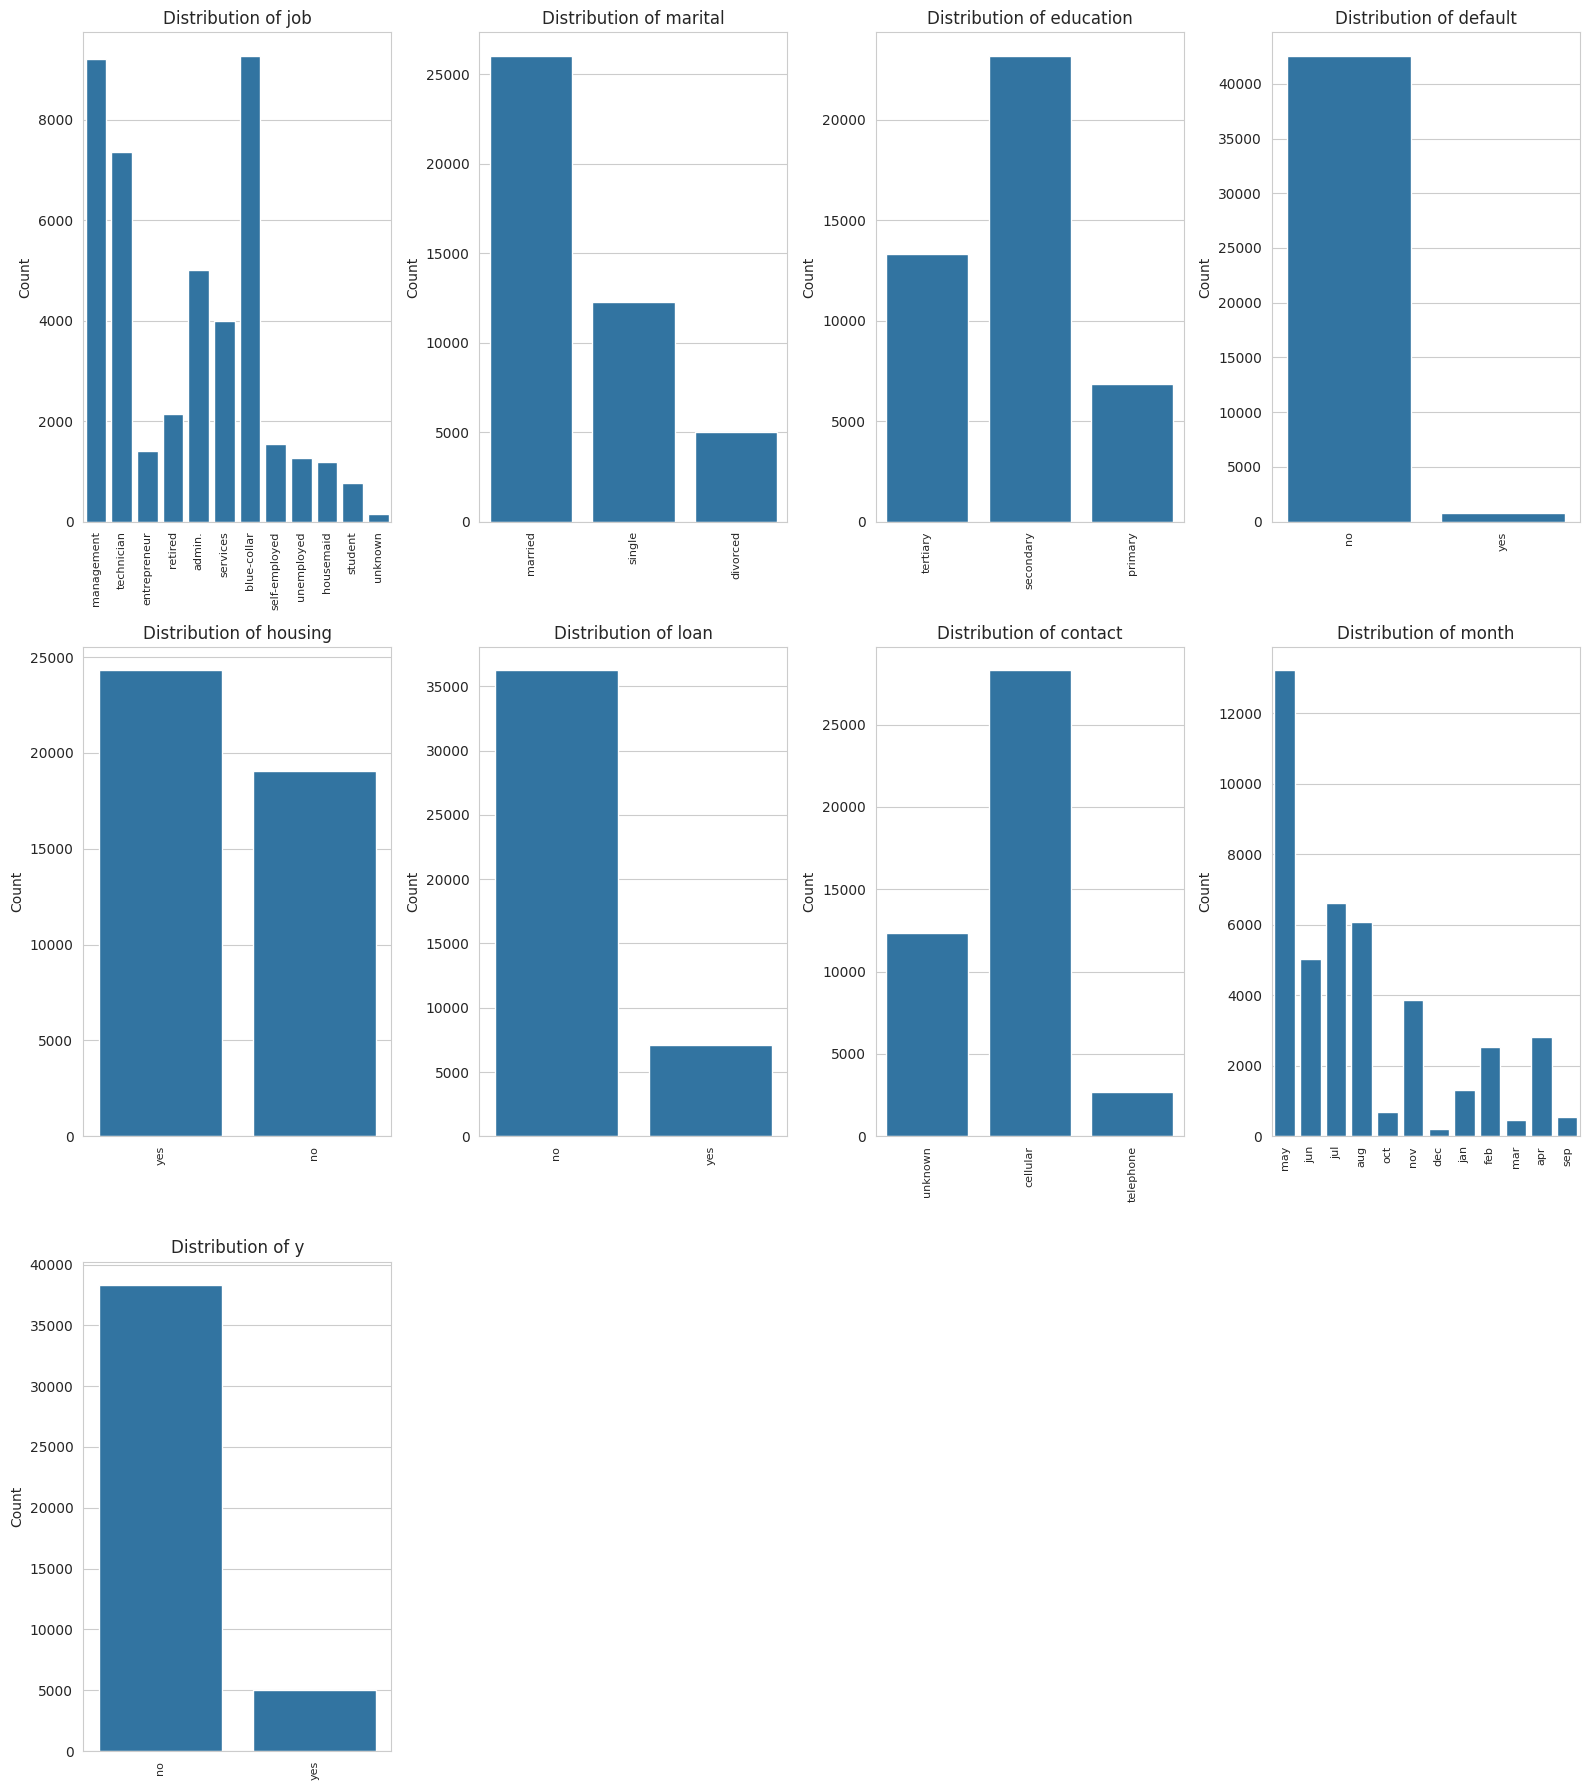

In [25]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First of all, I need to select the norminal features
nominal_features = list(col for col in data_full.columns if data_full[col].dtype == 'object')

# Then, I can plot the distribution of each norminal feature in a subplot figure
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# flatten the axes array to 1-d
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=data_full, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {col}') 
    # smaller font for x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # remove the x-axis label and set the label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# if there are more subplots than features to plot, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# adjust the subplot layout to fill the figure area
plt.tight_layout() 
plt.show()

We do not have any ordinal features. So we can use the one-hot encoding method to encode the nominal features.

## One-hot encoding


In [26]:
# Creating an empty list to store the nominal features
nominal_features = []

print('The nominal features are:')
for i in data_full.select_dtypes(include=['object']).columns:
    print('-', i)
    # Creating a list with the nominal features, to use it later
    nominal_features.append(i)

The nominal features are:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- y


dummy variable trap -> https://www.linkedin.com/pulse/dummy-variable-trap-how-reduce-redundancies-reday-zarra/

solution: one not encoding di scikit-learn

In [ ]:
# X is the training dataset and we are using Sci-Kit Learn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

print(X)

In [56]:
df_dummy = data_full.copy()
df_dummy = pd.get_dummies(data_full, columns=nominal_features, dtype=int)

# Here, we'll assume 'y_yes' = 1 will represent the positive class
df_dummy['y'] = df_dummy['y_yes'].astype(int) # Convert the target variable to integer
df_dummy.drop(['y_no', 'y_yes'], axis=1, inplace=True) # Drop the original target variable columns

# Checking the shape of the dataframe
print('The shape of the dataframe is:', data_full.shape[0], 'rows and', data_full.shape[1], 'features.')
print('The shape of the dataframe with dummy variables is:', df_dummy.shape[0], 'rows and',
    df_dummy.shape[1], 'features.')

The shape of the dataframe is: 43354 rows and 15 features.
The shape of the dataframe with dummy variables is: 43354 rows and 46 features.


In [57]:
df_dummy.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5,35,231,5,139,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,28,447,5,217,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [58]:
df_dummy.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'y'],
      dtype=object)

Again we check for high correlation...

In [59]:
df_dummy.corr().abs()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
age,1.000000,0.097132,0.008941,0.005296,0.004241,0.001175,0.058377,0.043060,0.021280,0.086258,0.023835,0.446815,0.007049,0.065836,0.185733,0.069156,0.002328,0.029631,0.168295,0.280905,0.425184,0.209323,0.083528,0.075229,0.016206,0.016206,0.186032,0.186032,0.010794,0.010794,0.061364,0.162946,0.022755,0.028818,0.072733,0.023926,0.000173,0.009715,0.003932,0.051317,0.020441,0.128220,0.035203,0.056860,0.034546,0.024187
balance,0.097132,1.000000,0.004229,0.019802,0.016307,0.016503,0.027946,0.047125,0.009925,0.001168,0.070382,0.049210,0.018608,0.040276,0.000645,0.017729,0.009530,0.006462,0.021990,0.026171,0.012809,0.014861,0.070718,0.088237,0.066481,0.066481,0.067344,0.067344,0.084479,0.084479,0.015612,0.038392,0.037088,0.015775,0.007707,0.018095,0.003916,0.024212,0.065786,0.029262,0.024094,0.069608,0.117927,0.040170,0.023432,0.051005
day,0.008941,0.004229,1.000000,0.029727,0.165020,0.052230,0.011929,0.024619,0.002403,0.004301,0.020198,0.008661,0.005302,0.010110,0.012110,0.032711,0.006513,0.006291,0.000167,0.006049,0.006695,0.020071,0.006080,0.022451,0.008585,0.008585,0.029466,0.029466,0.011233,0.011233,0.018237,0.021146,0.030596,0.046623,0.033109,0.010747,0.285821,0.249247,0.144890,0.196908,0.019366,0.023325,0.096908,0.030001,0.052020,0.030061
duration,0.005296,0.019802,0.029727,1.000000,0.083275,0.000587,0.016729,0.010406,0.001532,0.006668,0.008580,0.025709,0.007682,0.000892,0.004750,0.009140,0.019141,0.007869,0.004646,0.022292,0.020932,0.003805,0.002022,0.000823,0.011027,0.011027,0.004377,0.004377,0.012695,0.012695,0.025170,0.023870,0.013738,0.040021,0.041020,0.017828,0.008955,0.008965,0.015233,0.019318,0.003768,0.006813,0.005724,0.013699,0.014204,0.397331
campaign,0.004241,0.016307,0.165020,0.083275,1.000000,0.032659,0.022895,0.007431,0.002052,0.003795,0.018964,0.031179,0.006720,0.006725,0.020849,0.022691,0.020248,0.010714,0.015891,0.030626,0.021993,0.010479,0.020786,0.014192,0.016260,0.016260,0.026215,0.026215,0.010106,0.010106,0.030049,0.052642,0.003436,0.069338,0.156056,0.012996,0.030906,0.063416,0.101907,0.042855,0.019567,0.068284,0.085706,0.050953,0.037568,0.072840
previous,0.001175,0.016503,0.052230,0.000587,0.032659,1.000000,0.015210,0.015928,0.008168,0.016219,0.017605,0.005194,0.003036,0.010682,0.023777,0.000586,0.009283,0.004243,0.004557,0.012380,0.016704,0.017664,0.007603,0.022195,0.017879,0.017879,0.036940,0.036940,0.011248,0.011248,0.129789,0.028444,0.152212,0.053189,0.053599,0.036550,0.064604,0.047460,0.083438,0.059055,0.027470,0.003139,0.036961,0.052888,0.064835,0.092295
job_admin.,0.058377,0.027946,0.011929,0.016729,0.022895,0.015210,1.000000,0.188401,0.066224,0.060788,0.187600,0.082375,0.069291,0.115174,0.048712,0.163202,0.062824,0.022044,0.034018,0.061757,0.042943,0.115044,0.223418,0.150636,0.011552,0.011552,0.043263,0.043263,0.032156,0.032156,0.000341,0.011394,0.006479,0.020649,0.073888,0.000070,0.003908,0.006690,0.017345,0.003304,0.014936,0.026121,0.009933,0.012485,0.009185,0.007230
job_blue-collar,0.043060,0.047125,0.024619,0.010406,0.007431,0.015928,0.188401,1.000000,0.095705,0.087850,0.271116,0.119048,0.100139,0.166448,0.070397,0.235857,0.090792,0.031857,0.064434,0.123609,0.088553,0.353364,0.045740,0.328966,0.009474,0.009474,0.175025,0.175025,0.018561,0.018561,0.129967,0.000288,0.137279,0.027603,0.117832,0.025563,0.037150,0.034604,0.013279,0.022734,0.040750,0.164218,0.046878,0.042487,0.043181,0.070720
job_entrepreneur,0.021280,0.009925,0.002403,0.001532,0.002052,0

Let's take a look at the correlations among the features:


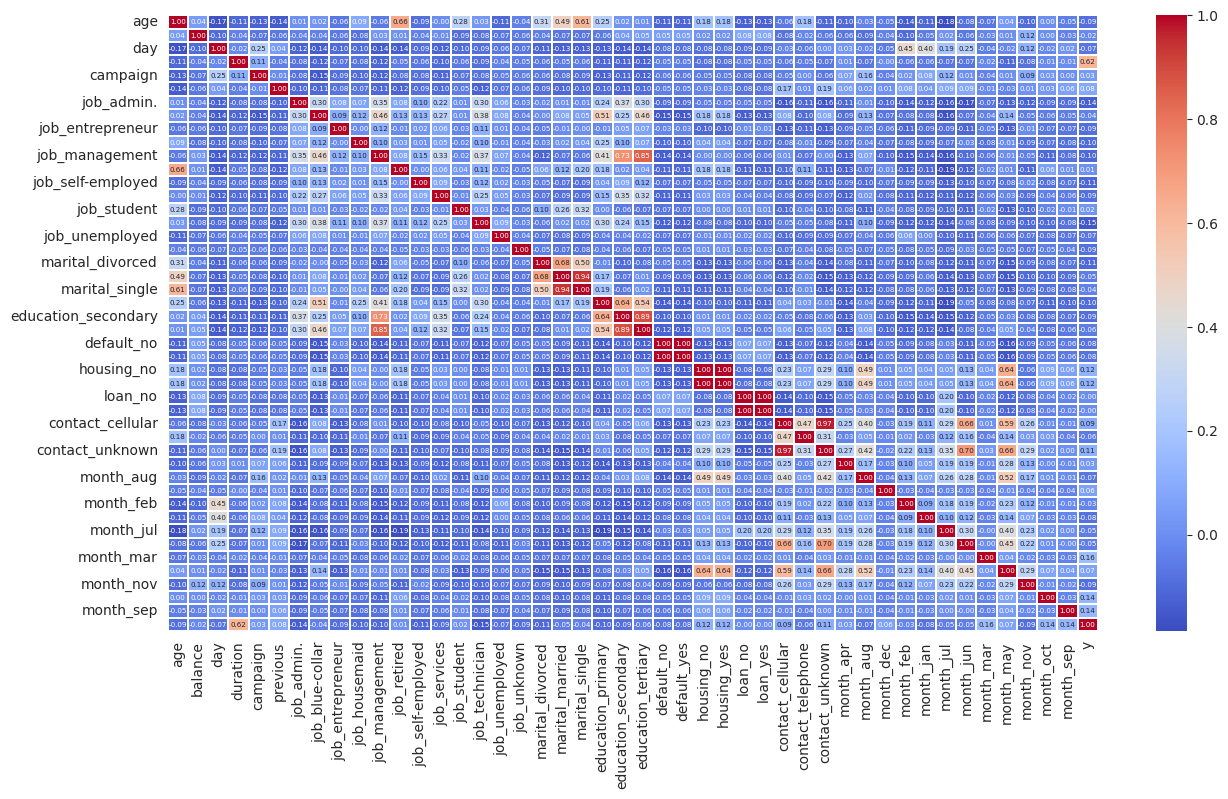

In [61]:
corr = df_dummy.corr().abs()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

We need to extract the top 15 correlated pairs of features in order to drop them. I consider as benchmark 0.7 since it measures as a higher correlation.



In [64]:
corr = df_dummy.corr() #df_dummy is the dataframe with the dummy variables
# we set the diagonal to zero
for i in range(len(corr)):
    corr.iloc[i,i] = 0  # we do not want to consider the self correlation among the variables


top_corr = corr.abs().unstack().sort_values(ascending=False) #trasforma un DataFrame o una Serie con un indice MultiLivello in un nuovo DataFrame con un indice meno annidato.
top_corr = top_corr[top_corr > 0.70]
top_corr

loan_yes             loan_no                1.000000
loan_no              loan_yes               1.000000
default_yes          default_no             1.000000
default_no           default_yes            1.000000
housing_yes          housing_no             1.000000
housing_no           housing_yes            1.000000
contact_cellular     contact_unknown        0.864787
contact_unknown      contact_cellular       0.864787
marital_single       marital_married        0.770674
marital_married      marital_single         0.770674
education_secondary  education_tertiary     0.713842
education_tertiary   education_secondary    0.713842
dtype: float64

variable dummy trap!!!!!

In [65]:
to_be_removed = [i[0] for i in top_corr.index]
to_be_removed = set(to_be_removed) #remove the pairs of features that are correlated
to_be_removed



{'contact_cellular',
 'contact_unknown',
 'default_no',
 'default_yes',
 'education_secondary',
 'education_tertiary',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'marital_married',
 'marital_single'}

In [66]:
#and drop one of them
df_dummy = df_dummy.drop(to_be_removed, axis=1)
df_dummy.head(5)

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,35,231,5,139,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,28,447,5,217,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


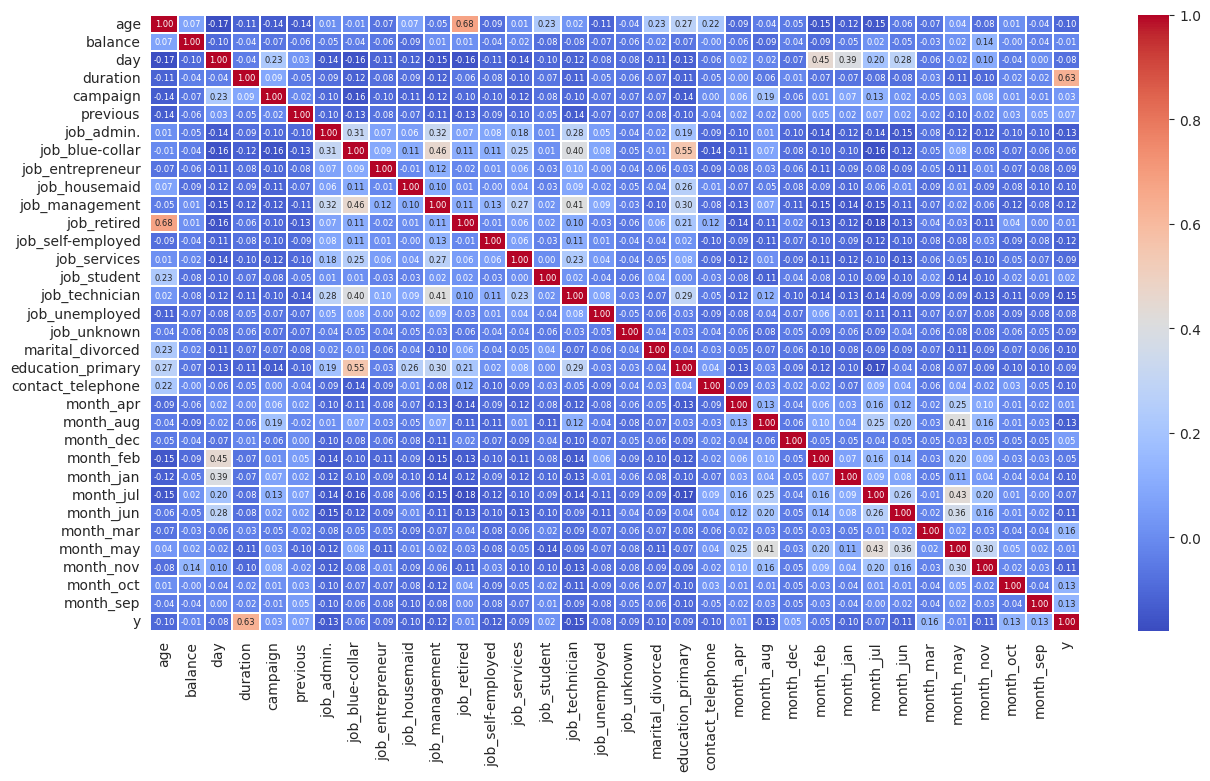

In [67]:
corr = df_dummy.corr().abs()

# Now you can calculate the correlation
plt.figure(figsize=(15,8))

sns.heatmap(corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(corr.corr()))})

plt.show();

In [68]:
df_dummy.to_csv('df_dummy.csv', index=False)

# Model Training

## Data Creation

It's now time to build our vectorial representation and create all the splits (train/validation/test)

In [69]:
import pandas as pd
df_dummy = pd.read_csv('df_dummy.csv', sep=',')

df_dummy.head()

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,35,231,5,139,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,447,5,217,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Since the variable y is extracted as a slice of a DataFrame, it results in a 2D array (even if it's only one column).

To prevent a DataConversionwarning, we need to use this code:

In [70]:
X = df_dummy.drop(['y'], axis='columns')
y = df_dummy[['y']].values.ravel()

print('Shape of X: {}\n Shape of Y: {}'.format(X.shape, y.shape))


Shape of X: (43354, 33)
 Shape of Y: (43354,)


In [39]:
X

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2143,5,261,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,44,29,5,151,1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,33,2,5,76,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,35,231,5,139,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,28,447,5,217,1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43349,51,825,17,977,3,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
43350,71,1729,17,456,2,0,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
43351,72,5715,17,1127,5,3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
43352,57,668,17,508,4,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False


In [40]:
y

array([0, 0, 0, ..., 1, 0, 0])

Before training the model, it is important to scale the data to avoid the dominance of the features with higher values.

Working with scaled data will also speed up the training process and will improve the performance of the model.

I will use StandardScaler of sklean to scale the data: this method will transform the data in such a way that the mean of the data will be 
0
 and the standard deviation will be 
1
, so as to have a normal distribution.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X[['age', 'balance', 'day', 'duration', 'campaign', 'previous']] = scaler.fit_transform(X[['age', 'balance', 'day', 'duration', 'campaign', 'previous']])
X = pd.DataFrame(X, columns=X.columns)
X.head()

#robustscaler (lavora meglio con outliers) vs stardardscaler

,age,balance,day,duration,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,education_primary,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.636763,0.259146,-1.300952,0.010854,-0.574199,-0.250795,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,0.305821,-0.436276,-1.300952,-0.415461,-0.574199,-0.250795,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,-0.739919,-0.445158,-1.300952,-0.706131,-0.574199,-0.250795,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,-0.549785,-0.369826,-1.300952,-0.461968,-0.574199,-0.250795,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,-1.215256,-0.298770,-1.300952,-0.159672,-0.574199,-0.250795,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# Splitting dataset into Training set, Validation set and Test set

In [42]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train_80, X_test, y_train_80, y_test = train_test_split(X, y,
                                                          test_size=0.20, random_state=4)

# we select 0.20 of the training set as validation (i.e. 20% on the total dataset)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80,
                                                      test_size=0.20 , random_state=1)

# 60 20 20 -> 80 10 10

We split the data in a way that we obtain a 

In [43]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_valid))
print("Test set size:", len(X_test))

Training set size: 27746
Validation set size: 6937
Test set size: 8671


## Random Forest

We will begin to use a random forest




A Random Forest is a meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the *max_samples* parameter if *bootstrap* is set to True. If *bootstrap* is set to False, the whole dataset is used to build the tree.

The *n_estimators* parameter is the number of trees in the forest.






In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators can be tuned

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred = rf_classifier.predict(X_valid)

# Calculate metrics on the validation set
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
f1_score_valid = f1_score(y_valid, y_valid_pred)


print(f"Validation Accuracy: {accuracy_valid}")
print(f"Validation F1 Score: {f1_score_valid}")

Validation Accuracy: 0.9055787804526453
Validation F1 Score: 0.48057097541633625


 An F1 score of 48.1% is relatively low, especially in contrast to the high accuracy. This discrepancy typically indicates that the model might be performing well in predicting the majority class but poorly in predicting the minority class

 An accuracy of over 90% is generally considered very good in many contexts. However, the relevance of this number greatly depends on the distribution of the classes (the balance between the 'yes' and 'no' classes) in your dataset

In [45]:
print(f'Importance of features: {rf_classifier.feature_importances_}')



Importance of features: [0.12207132 0.1247117  0.11440465 0.30359792 0.04416845 0.05045433
 0.00998107 0.00948555 0.00368556 0.00385324 0.0128297  0.00539872
 0.00514937 0.00741965 0.00640292 0.01163324 0.00557189 0.00093755
 0.01239735 0.01009088 0.00928219 0.01099656 0.01206262 0.004273
 0.00979309 0.0066705  0.00902607 0.00924642 0.01662812 0.01251854
 0.00925918 0.01276324 0.01323542]


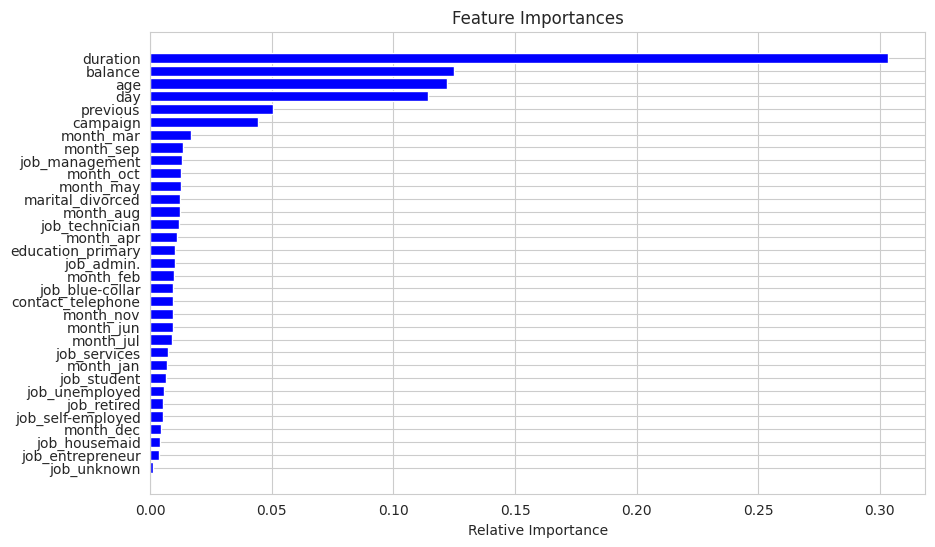

In [46]:
def plot_feature_importances(classifier):
    importances = classifier.feature_importances_
    features = X.columns
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="b", align="center")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

plot_feature_importances(rf_classifier)

eliminare duration -> consigliato sul sito web

### Hyperparameters tuning




n_estimators -> more trees will yields a more robust ensemble by reducing overfitting, but more trees needs more memory and time to train.
Instead max_fueatures will follow the rules of dumbs. 

#### Grid Search with training set and validation set

We are going to implement a grid search just as for loops over two parameters **n_estimators** and **max_depth**.

In [47]:
from sklearn.ensemble import RandomForestClassifier


best_score = 0
for trees in [100, 200, 300, 400]:
    for depth in [10, 20, 30, 40]:
      rf = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=42)
      rf.fit(X_train, y_train)
      score = rf.score(X_valid, y_valid)
      if score > best_score:
        best_score = score
        best_parameters = {'n_estimators': trees, 'max_depth': depth}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
rf = RandomForestClassifier(**best_parameters, random_state=42)
rf.fit(X_train_80, y_train_80)
test_score = rf.score(X_test, y_test)
print(f"Best score on validation set: {best_score}")
print(f"Best parameters: {best_parameters}")
print(f"Test set score with best parameters: {test_score}")

Best score on validation set: 0.9083177165921869
Best parameters: {'n_estimators': 400, 'max_depth': 30}
Test set score with best parameters: 0.9005881674547341


#### Grid Search with cross validation

We implement a cross validation score in the grid search process 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

for trees in [100, 200, 300, 400]:
    for depth in [10, 20, 30, 40]:
      # Initialize the Random Forest classifier
      rf = RandomForestClassifier(n_estimators=trees, max_depth=depth, random_state=42)
      # perform cross-validation
      scores = cross_val_score(rf, X_train_80, y_train_80, cv=4)
      # compute the mean score 
      score = np.mean(scores)
      # if the score is better than the previous best, store the score and parameters
      if score > best_score:
        best_score = score
        best_parameters = {'n_estimators': trees, 'max_depth': depth}

# rebuild a model on the combined training and validation set, and evaluate it on the test set
rf = RandomForestClassifier(**best_parameters, random_state=42)
rf.fit(X_train_80, y_train_80)
test_score = rf.score(X_test, y_test)
print(f"Best score on validation set: {best_score}")
print(f"Best parameters: {best_parameters}")
print(f"Test set score with best parameters: {test_score}")

Best score on validation set: 0.9083177165921869
Best parameters: {'n_estimators': 400, 'max_depth': 30}
Test set score with best parameters: 0.9005881674547341


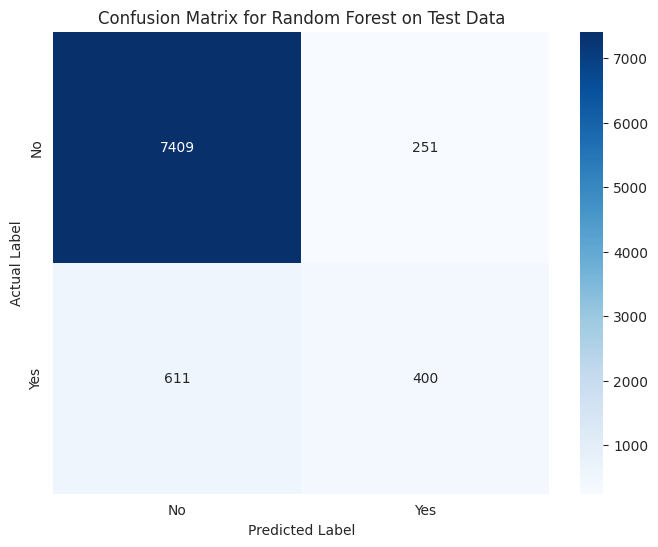

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred_test = rf.predict(X_test)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search
param_grid = { 
    'n_estimators': [100, 200, 300, 400], 
    'max_depth': [10, 20, 30, 40]}

# Create a base model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4)

# Fit the grid search to the data
grid_search.fit(X_train_80, y_train_80)

# Print the best parameters
print(grid_search.best_params_)
# Print the best score
print('Test set score: ', grid_search.best_score_)




{'max_depth': 20, 'n_estimators': 400}
Test set score:  0.9022288363404138


### Analysing RandomForestClassifier

Now we will:
- plot the tree with graphviz
- use the *feature_importances_ attribute of the RandomForestClassifier to get the importance of the features.
- plot the tree with graphviz



In [51]:
print(f'Features importance:\n {rf.feature_importances_}')

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

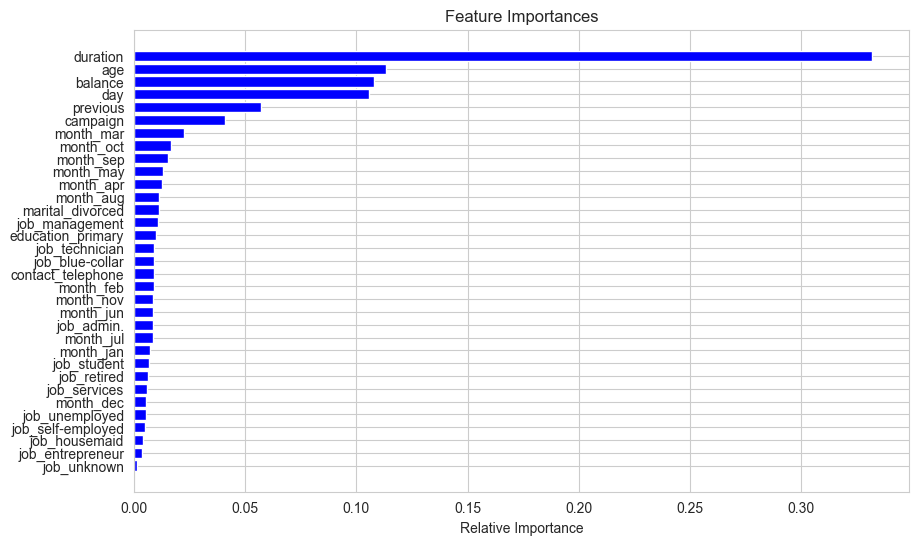

In [ ]:
plot_feature_importances(rf)



## Logistic Regresssion

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_log = log_reg.predict(X_valid)

# Calculate metrics on the validation set
accuracy_valid_log = accuracy_score(y_valid, y_valid_pred_log)
f1_score_valid_log = f1_score(y_valid, y_valid_pred_log)

print(f"Validation Accuracy (Logistic Regression): {accuracy_valid_log}")
print(f"Validation F1 Score (Logistic Regression): {f1_score_valid_log}")


Validation Accuracy (Logistic Regression): 0.8966411993657201
Validation F1 Score (Logistic Regression): 0.3546354635463546


### Hyperparameter Tuning with Grid Search

In [72]:

from sklearn.model_selection import GridSearchCV

# Setup parameter grid
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}

# Grid search for logistic regression
grid_log = GridSearchCV(LogisticRegression(random_state=42), param_grid_log, cv=4)
grid_log.fit(X_train_80, y_train_80)

# Print the best parameters and best score
print("Best parameters (Logistic Regression):", grid_log.best_params_)
print("Best score on validation set (Logistic Regression):", grid_log.best_score_)


Best parameters (Logistic Regression): {'C': 10}
Best score on validation set (Logistic Regression): 0.8936366658299809


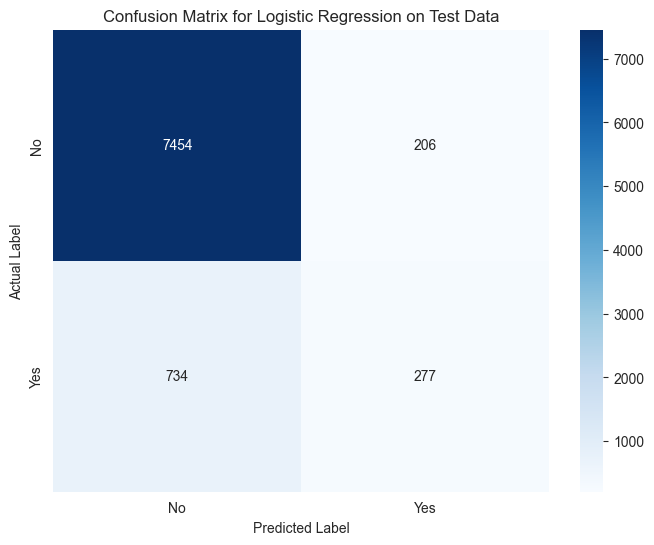

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use the best model to predict on test set
y_pred_test_log = grid_log.best_estimator_.predict(X_test)

# Generate the confusion matrix
cm_test_log = confusion_matrix(y_test, y_pred_test_log)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_log, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# SVC

## Train and Validate the SVM Model

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC(random_state=42)

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict on the validation set
y_valid_pred_svm = svm.predict(X_valid)

# Calculate metrics on the validation set
accuracy_valid_svm = accuracy_score(y_valid, y_valid_pred_svm)
f1_score_valid_svm = f1_score(y_valid, y_valid_pred_svm)

print(f"Validation Accuracy (SVM): {accuracy_valid_svm}")
print(f"Validation F1 Score (SVM): {f1_score_valid_svm}")


Validation Accuracy (SVM): 0.9041372351160444
Validation F1 Score (SVM): 0.4340425531914894


In [ ]:
# Setup parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Grid search for SVM
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=4)
grid_svm.fit(X_train_80, y_train_80)

# Print the best parameters and best score
print("Best parameters (SVM):", grid_svm.best_params_)
print("Best score on validation set (SVM):", grid_svm.best_score_)


# Conclusion

### kinds of error we need to take in consideration

- **accuracy** is not a good measure of predictive performance as the number of mistakes doesn't contain all the information we are interested in. We can have some *false positive* (type I error) and *false negative*.
-  **imbalance dataset** 

So for these reasons we need to use a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# confusion = 
